<a href="https://colab.research.google.com/github/LK2705/lav-static-site/blob/main/EDA_prjct_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

count    18268.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Quantity Ordered, dtype: float64
count    18268.000000
mean       112.551864
std        138.265175
min          2.990000
25%         11.950000
50%         14.950000
75%        150.000000
max        357.075000
Name: Price Each, dtype: float64


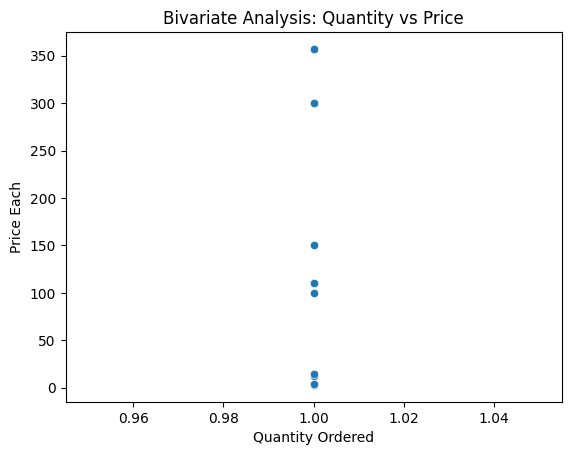

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load dataset
df = pd.read_csv("/content/Sales_April_2019.csv")

# 1. Remove duplicates
df = df.drop_duplicates()

# 2. Missing value treatment
# Drop rows where all values are NaN
df = df.dropna(how="all")

# Optionally fill missing values
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

df['Quantity Ordered'] = df['Quantity Ordered'].fillna(0)
df['Price Each'] = df['Price Each'].fillna(df['Price Each'].median())

# 3. Outlier treatment (IQR method)
def treat_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

df['Quantity Ordered'] = treat_outliers(df['Quantity Ordered'])
df['Price Each'] = treat_outliers(df['Price Each'])


# 4. Normalization and Scaling

scaler = StandardScaler()
df[['Quantity Ordered_scaled', 'Price Each_scaled']] = scaler.fit_transform(
    df[['Quantity Ordered', 'Price Each']]
)


# 5. Encoding categorical variables

df_encoded = pd.get_dummies(df, columns=['Product'], drop_first=True)


# 6. Univariate Analysis

print(df['Quantity Ordered'].describe())
print(df['Price Each'].describe())


# 7. Bivariate Analysis

# Example: Relationship between Quantity and Price
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x="Quantity Ordered", y="Price Each", data=df)
plt.title("Bivariate Analysis: Quantity vs Price")
plt.show()
